In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('tree.csv')

In [3]:
df

,Days,Outlook,Temperature,Routine,Wear Jacket
0,1,Sunny,Cold,Indoor,No
1,2,Sunny,Warm,Outdoor,No
2,3,Cloudy,Warm,Indoor,No
3,4,Sunny,Warm,Indoor,No
4,5,Cloudy,Cold,Indoor,Yes
5,6,Cloudy,Cold,Outdoor,Yes
6,7,Sunny,Cold,Outdoor,Yes


In [7]:
df=df.drop('Days', axis=1)

In [8]:
df

,Outlook,Temperature,Routine,Wear Jacket
0,Sunny,Cold,Indoor,No
1,Sunny,Warm,Outdoor,No
2,Cloudy,Warm,Indoor,No
3,Sunny,Warm,Indoor,No
4,Cloudy,Cold,Indoor,Yes
5,Cloudy,Cold,Outdoor,Yes
6,Sunny,Cold,Outdoor,Yes


In [9]:
x=df.drop('Wear Jacket', axis=1) # Wear Jacket drop

In [10]:
x

,Outlook,Temperature,Routine
0,Sunny,Cold,Indoor
1,Sunny,Warm,Outdoor
2,Cloudy,Warm,Indoor
3,Sunny,Warm,Indoor
4,Cloudy,Cold,Indoor
5,Cloudy,Cold,Outdoor
6,Sunny,Cold,Outdoor


In [11]:
y=df['Wear Jacket']

In [12]:
y

0     No
1     No
2     No
3     No
4    Yes
5    Yes
6    Yes
Name: Wear Jacket, dtype: object

# Preprocessing

In [14]:
#Encoding
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder() # object

In [29]:
x.Outlook=le.fit_transform(x['Outlook'])

In [30]:
x

,Outlook,Temperature,Routine
0,1,Cold,Indoor
1,1,Warm,Outdoor
2,0,Warm,Indoor
3,1,Warm,Indoor
4,0,Cold,Indoor
5,0,Cold,Outdoor
6,1,Cold,Outdoor


In [31]:
x.Temperature=le.fit_transform(x['Temperature'])
x.Routine=le.fit_transform(x['Routine'])

In [32]:
x

,Outlook,Temperature,Routine
0,1,0,0
1,1,1,1
2,0,1,0
3,1,1,0
4,0,0,0
5,0,0,1
6,1,0,1


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc=DecisionTreeClassifier()

In [35]:
dtc.fit(x,y)  # train full data set

DecisionTreeClassifier()

In [39]:
dtc.predict([[1,0,0]])  # 1=Sunny, 0=Cold, 0= Indoor

array(['No'], dtype=object)

In [37]:
dtc.predict([[1,1,1]])  # 1=Sunny, 1=Warm, 1=Outdoor

array(['No'], dtype=object)

In [38]:
dtc.predict([[1,0,1]])

array(['Yes'], dtype=object)

# Tree 

[Text(200.88000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 135.9, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

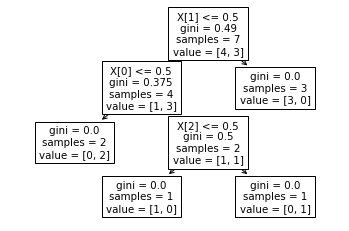

In [42]:
from sklearn import tree
tree.plot_tree(dtc)

[Text(200.88000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 135.9, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

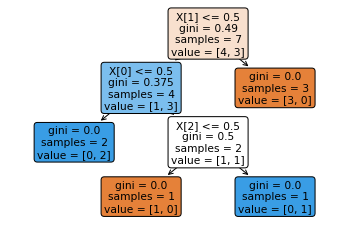

In [43]:
from sklearn import tree
tree.plot_tree(dtc, filled=True, rounded=True)  # colouring Tree

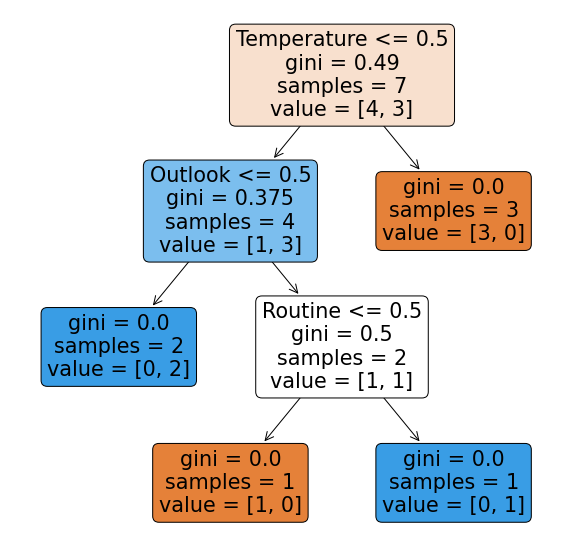

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(dtc, filled=True, rounded=True,feature_names=x.columns)
plt.savefig('tree.png')